In [51]:
import pandas as pd 
from sklearn import svm, metrics, tree, ensemble
from sklearn.model_selection import  train_test_split 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder

In [5]:
corr_csv = pd.read_csv("correct_Y.csv")
forw_csv = pd.read_csv("forward_Y.csv")

In [8]:
corr_df, forw_df = pd.DataFrame(corr_csv).drop(['Unnamed: 0'], axis="columns"), pd.DataFrame(forw_csv).drop(['Unnamed: 0'], axis="columns")

In [9]:
join_df = corr_df.join(forw_df, how="right")

In [15]:
join_df.describe()

,c_Y,f_Y
count,993.000000,993.000000
mean,80.646526,63.434038
std,11.684224,15.405864
min,44.000000,30.000000
25%,73.000000,49.000000
50%,82.000000,63.000000
75%,88.000000,73.000000
max,117.000000,103.000000


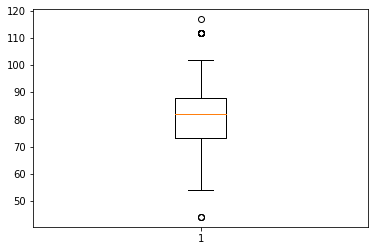

In [16]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


a = plt.boxplot(join_df["c_Y"])
plt.show()

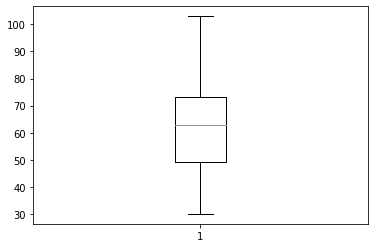

In [17]:
b = plt.boxplot(join_df["f_Y"])
plt.show()

In [18]:
import numpy as np
Q1 = np.percentile(join_df["c_Y"], 25) 
Q3 = np.percentile(join_df["c_Y"], 75) 
IQR = Q3 - Q1 
outlier_step = 1.5 * IQR

outlier_step

22.5

In [26]:
join_df[(join_df["c_Y"] < Q1 - outlier_step) | (join_df["c_Y"] > Q3 + outlier_step)].index

Int64Index([235, 261, 366, 370, 375, 380, 383, 388, 398, 815, 945, 950, 954,
            960, 963, 966, 976],
           dtype='int64')

In [28]:
join_df.drop(join_df.index[235])
join_df.drop(join_df.index[261])
join_df.drop(join_df.index[366])
join_df.drop(join_df.index[370])
join_df.drop(join_df.index[375])
join_df.drop(join_df.index[380])
join_df.drop(join_df.index[383])
join_df.drop(join_df.index[388])
join_df.drop(join_df.index[398])
join_df.drop(join_df.index[815])
join_df.drop(join_df.index[945])
join_df.drop(join_df.index[950])
join_df.drop(join_df.index[954])
join_df.drop(join_df.index[960])
join_df.drop(join_df.index[963])
join_df.drop(join_df.index[966])
join_df.drop(join_df.index[976])

,c_Y,f_Y
0,88,63
1,73,68
2,98,69
3,58,78
4,78,82
...,...,...
988,83,59
989,58,58
990,92,63
991,87,48


In [62]:
co_df = pd.DataFrame(list(join_df["c_Y"]), columns=["data"])
co_df["data"] = co_df["data"] / abs(co_df["data"].max()) 
c_labels = ["0" for i in range(len(co_df))]
c_labels_df = pd.DataFrame(c_labels, columns=["labels"])
co_df = co_df.join(c_labels_df, how="right")
co_df.head()

,data,labels
0,0.752137,0
1,0.623932,0
2,0.837607,0
3,0.495726,0
4,0.666667,0


In [63]:
fo_df = pd.DataFrame(list(join_df["f_Y"]), columns=["data"])
fo_df["data"] = fo_df["data"] / abs(fo_df["data"].max()) 
f_labels = ["1" for i in range(len(fo_df))]
f_labels_df = pd.DataFrame(f_labels, columns=["labels"])
fo_df = fo_df.join(f_labels_df, how="right")
fo_df.head()

,data,labels
0,0.611650,1
1,0.660194,1
2,0.669903,1
3,0.757282,1
4,0.796117,1


In [64]:
cofo_df = pd.concat([co_df, fo_df])
cofo_df

,data,labels
0,0.752137,0
1,0.623932,0
2,0.837607,0
3,0.495726,0
4,0.666667,0
...,...,...
988,0.572816,1
989,0.563107,1
990,0.611650,1
991,0.466019,1


In [65]:
data_shuffled = cofo_df.sample(frac=1)  # row 전체 shuffle

data_shuffled = cofo_df.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset
data_shuffled

,data,labels
0,0.563107,1
1,0.786325,0
2,0.475728,1
3,0.786325,0
4,0.700855,0
...,...,...
1981,0.581197,0
1982,1.000000,1
1983,0.757282,1
1984,0.752137,0


In [66]:
pose_data = data_shuffled[["data"]]
pose_label = data_shuffled["labels"]
train_data, test_data , train_label, test_label  =  train_test_split(pose_data, pose_label, test_size=0.2)

In [67]:
model = svm.SVC(  )
model.fit(train_data, train_label  ) 
pre = model.predict( test_data )
ac_score = metrics.accuracy_score( test_label, pre ) 
print("SVC 정답률 = " , ac_score)

SVC 정답률 =  0.6231155778894473


In [68]:
model1 = tree.DecisionTreeClassifier()
model1.fit(train_data, train_label)
pre1 = model1.predict(test_data)
ac_score1 = metrics.accuracy_score(test_label, pre1)
print("의사결정 트리 정답률 = ", ac_score1)

의사결정 트리 정답률 =  0.9974874371859297


In [69]:
model3 = tree.ExtraTreeClassifier()
model3.fit(train_data, train_label)
pre3 = model3.predict(test_data)
ac_score3 = metrics.accuracy_score(test_label, pre3)
print("엑스트라 트리 회귀 정답률 = ", ac_score3)

엑스트라 트리 회귀 정답률 =  0.9974874371859297


In [70]:
model4 = ensemble.RandomForestClassifier()
model4.fit(train_data, train_label)
pre4 = model4.predict(test_data)
ac_score4 = metrics.accuracy_score(test_label, pre4)
print("앙상블 랜덤포레스트 정답률 = ", ac_score4)

앙상블 랜덤포레스트 정답률 =  0.9974874371859297


In [71]:
model5 = ensemble.AdaBoostClassifier()
model5.fit(train_data, train_label)
pre5 = model5.predict(test_data)
ac_score5 = metrics.accuracy_score(test_label, pre5)
print("아다부스트 정답률 = ", ac_score5)

아다부스트 정답률 =  0.9547738693467337


In [72]:
model6 = ensemble.BaggingClassifier()
model6.fit(train_data, train_label)
pre6 = model6.predict(test_data)
ac_score6 = metrics.accuracy_score(test_label, pre6)
print("배깅 정답률 = ", ac_score6)

배깅 정답률 =  0.9974874371859297


In [73]:
model7 = ensemble.GradientBoostingClassifier()
model7.fit(train_data, train_label)
pre7 = model7.predict(test_data)
ac_score7 = metrics.accuracy_score(test_label, pre7)
print("경사 부스팅 정답률 = ", ac_score7)

경사 부스팅 정답률 =  0.992462311557789


In [74]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
model8 = ensemble.StackingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])
model8.fit(train_data, train_label)
pre8 = model8.predict(test_data)
ac_score8 = metrics.accuracy_score(test_label, pre8)
print("스태킹 정답률 = ", ac_score8)

스태킹 정답률 =  0.9974874371859297


In [75]:
model9 = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting="hard")
model9.fit(train_data, train_label)
pre9 = model9.predict(test_data)
ac_score9 = metrics.accuracy_score(test_label, pre9)
print("보팅 하드 정답률 = ", ac_score9)

보팅 하드 정답률 =  0.6582914572864321


In [76]:
model9_1 = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting="soft")
model9_1.fit(train_data, train_label)
pre9_1 = model9_1.predict(test_data)
ac_score9_1 = metrics.accuracy_score(test_label, pre9_1)
print("보팅 소프트 정답률 = ", ac_score9_1)

보팅 소프트 정답률 =  0.9974874371859297


In [77]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
model10 = ensemble.HistGradientBoostingClassifier()
model10.fit(train_data, train_label)
pre10 = model10.predict(test_data)
ac_score10 = metrics.accuracy_score(test_label, pre10)
print("히스트그래디언트부스팅 정답률 = ", ac_score10)

히스트그래디언트부스팅 정답률 =  0.9949748743718593
